
# **1. Importing the dependencies**

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# **2. Data Loading & Understanding**

In [100]:
# read the csv data to a pandas dataframe
df=pd.read_csv("/content/train.csv")
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


Initial Inspection

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [103]:
#droping the id and age_desc
df = df.drop(columns=["ID", "age_desc"])


In [104]:
# taget class distribution
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


In [105]:
# convert age column datatype to integer
df['age']=df['age'].round().astype(int)

# **encoding the categorical columns**

In [106]:
df['gender'].unique()

array(['f', 'm'], dtype=object)

In [107]:
df['gender']=df['gender'].map({'f':0,'m':1})

In [108]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [109]:
df['ethnicity']=df['ethnicity'].apply(lambda x:x.replace('?','others'))
df['ethnicity']=df['ethnicity'].apply(lambda x:x.replace('others','Others'))


In [110]:
df['ethnicity'].value_counts()

,count
ethnicity,
White-European,257
Others,235
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Latino,17
Hispanic,9


In [111]:
df['ethnicity']=LabelEncoder().fit_transform(df['ethnicity'])

In [112]:
df['ethnicity'].value_counts()

,count
ethnicity,
9,257
5,235
4,97
0,67
1,47
7,34
6,32
3,17
2,9


In [113]:
df['jaundice'].unique()

array(['no', 'yes'], dtype=object)

In [114]:
df['jaundice']=df['jaundice'].map({'no':0,'yes':1})

In [115]:
df['austim'].unique()

array(['no', 'yes'], dtype=object)

In [116]:
df['austim']=df['austim'].map({'no':0,'yes':1})

In [117]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [118]:
df['contry_of_res'].value_counts()

,count
contry_of_res,
United States,134
India,108
New Zealand,78
United Kingdom,67
Jordan,55
United Arab Emirates,40
Australia,37
Canada,30
Afghanistan,22


In [119]:
df['contry_of_res']=LabelEncoder().fit_transform(df['contry_of_res'])

In [120]:
df['used_app_before'].value_counts()

,count
used_app_before,
no,750
yes,50


In [121]:
df['used_app_before']=df['used_app_before'].map({'no':0,'yes':1})

In [122]:
df['relation'].value_counts()

,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [123]:
df['relation']=df['relation'].apply(lambda x:x.replace('?','Others'))


In [124]:
df['relation']=LabelEncoder().fit_transform(df['relation'])

In [125]:
df['relation'].unique()

array([4, 3, 2, 1, 0])

In [126]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


# **3. Exploratory Data Analysis (EDA)**

In [127]:
df.shape

(800, 20)

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000
A10_Score,800.0,0.617500,0.486302,0.000000,0.000000,1.000000,1.000000,1.000000


Univariate Analysis

Univariate Analysis: A Deep Dive
Univariate analysis is a statistical method used to describe a single variable. It involves analyzing data for one variable at a time to identify patterns and trends. The primary goal is to understand the distribution and characteristics of the variable.

Key Techniques in Univariate Analysis:

1. Descriptive Statistics:
Measures of Central Tendency:
Mean: Average value of the data.
Median: Middle value when data is sorted.
Mode: Most frequent value.
Measures of Dispersion:
Range: Difference between maximum and minimum values.
Variance: Measures how spread out the data is from the mean.
Standard Deviation: Square root of the variance.
Quartiles and Percentiles: Divide data into equal parts.
2. Data Visualization:
Histograms: Visualize the distribution of numerical data.
Bar Charts: Visualize the frequency distribution of categorical data.
Box Plots: Show the distribution of data, including outliers and quartiles.
Pie Charts: Visualize the proportion of different categories.
Why Univariate Analysis is Important:

Data Understanding: It helps you understand the basic characteristics of your data.
Data Cleaning: It can identify outliers, errors, and inconsistencies.
Data Exploration: It can reveal patterns and trends that might not be apparent at first glance.
Hypothesis Testing: It can be used to test hypotheses about the population.
Example:

Suppose you have a dataset of customer ages. You can perform univariate analysis to:

Calculate:
Mean age
Median age
Mode age
Range of ages
Standard deviation of ages
Visualize:
Create a histogram to see the distribution of ages.
Use a box plot to identify outliers and quartiles.
By understanding these aspects, you can gain valuable insights into your data and make informed decisions.

Numerical Columns:

age

result

In [129]:
#setting theme
sns.set_theme(style="darkgrid")

Mean Age: 28.4425
Median Age: 25.0


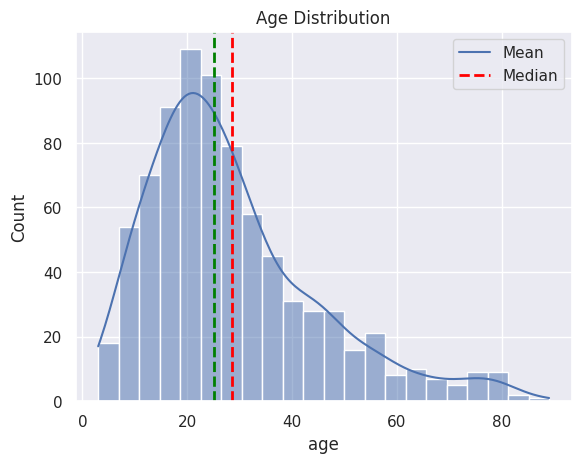

In [130]:
#histogram plot for age
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')

age_mean=df['age'].mean()
age_median=df['age'].median()

print(f'Mean Age: {age_mean}')
print(f'Median Age: {age_median}')

plt.axvline(age_mean,color='red',linestyle='dashed',linewidth=2)
plt.axvline(age_median,color='green',linestyle='dashed',linewidth=2)

legend_labels=['Mean','Median']
plt.legend(legend_labels)

plt.show()



Mean result: 8.537303106501248
Median result: 9.605299308


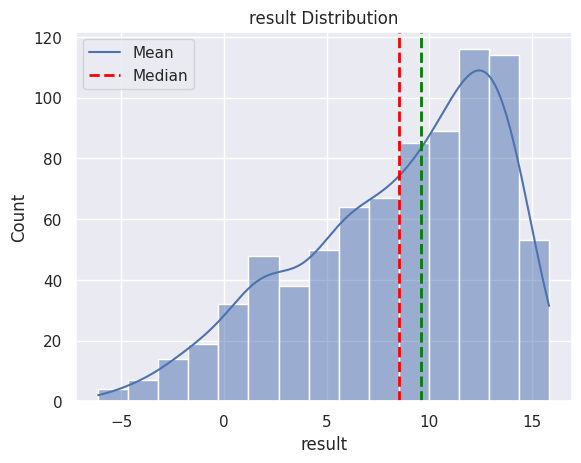

In [131]:
#histogram plot for age
sns.histplot(df['result'],kde=True)
plt.title('result Distribution')

result_mean=df['result'].mean()
result_median=df['result'].median()

print(f'Mean result: {result_mean}')
print(f'Median result: {result_median}')

plt.axvline(result_mean,color='red',linestyle='dashed',linewidth=2)
plt.axvline(result_median,color='green',linestyle='dashed',linewidth=2)

legend_labels=['Mean','Median']
plt.legend(legend_labels)

plt.show()



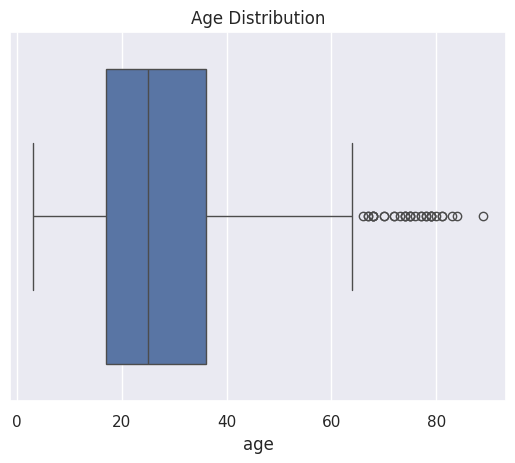

In [132]:
#box_plot
sns.boxplot(x=df['age'])
plt.title('Age Distribution')
plt.show()

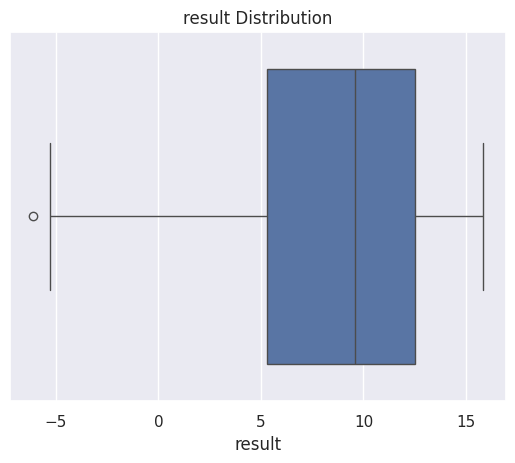

In [133]:
sns.boxplot(x=df['result'])
plt.title('result Distribution')
plt.show()

Outliers and IQR:
Outliers are data points that significantly deviate from the general trend or pattern of a dataset. They can be caused by various factors, such as measurement errors, data entry errors, or genuine anomalies.

Interquartile Range (IQR) is a statistical measure of dispersion that indicates the range of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).

Identifying Outliers Using IQR
A common method to identify outliers using IQR is the 1.5 IQR rule. It involves calculating the lower and upper bounds:

Lower Bound = Q1 - 1.5 * IQR
Upper Bound = Q3 + 1.5 * IQR
Any data point that falls below the lower bound or above the upper bound is considered an outlier.

Visualizing Outliers:

Box plots are a useful tool for visualizing outliers. The box represents the interquartile range, and the whiskers extend to the minimum and maximum values within 1.5 IQR. Points beyond the whiskers are considered outliers.

Handling Outliers:

The decision on how to handle outliers depends on the specific context and the nature of the data:

Domain Knowledge:
If you have domain expertise, you can assess whether the outliers are valid or errors.
Valid outliers might represent important information and should not be removed.
Statistical Methods:
Winsorization: Capping outliers to a certain percentile (e.g., 5th and 95th percentiles).
Trimming: Removing outliers altogether.
Transformation: Applying transformations like log or square root to reduce the impact of outliers.
Machine Learning Techniques:
Robust Models: Using robust machine learning algorithms that are less sensitive to outliers (e.g., Random Forest, XGBoost).
Outlier Detection Algorithms: Employ techniques like Isolation Forest or Local Outlier Factor to identify and handle outliers.

In [134]:
#finding count of outliers using inter_quartile_range
Q1=df['age'].quantile(0.25)
Q3=df['age'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outliers=df[(df['age']<lower_bound) | (df['age']>upper_bound)]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 33


In [135]:
Q1=df['result'].quantile(0.25)
Q3=df['result'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
outliers=df[(df['result']<lower_bound) | (df['result']>upper_bound)]
print(f'Number of outliers: {len(outliers)}')

Number of outliers: 1


Univariate analysis of Categorical columns

In [136]:
category_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
        'relation', 'Class/ASD']


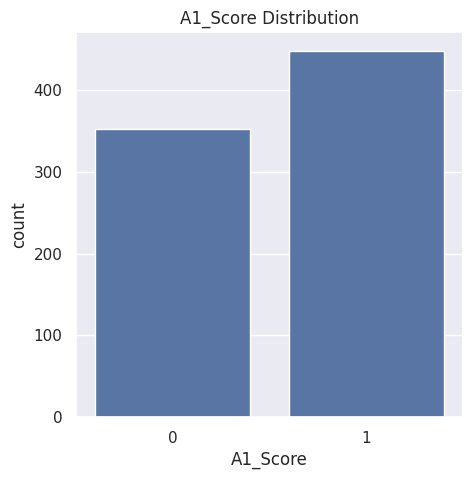

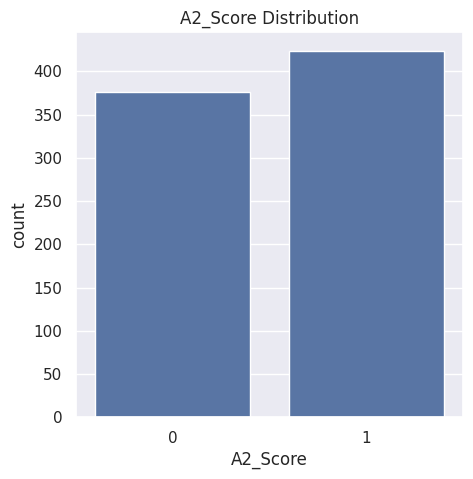

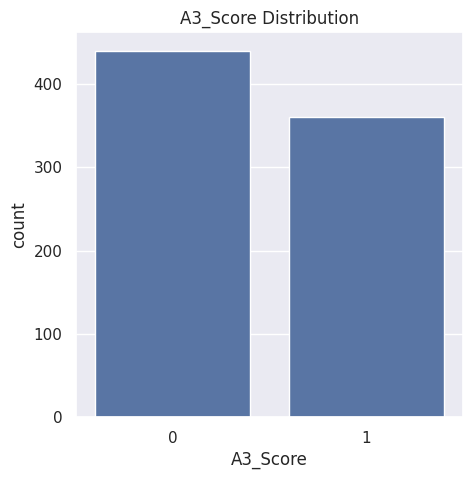

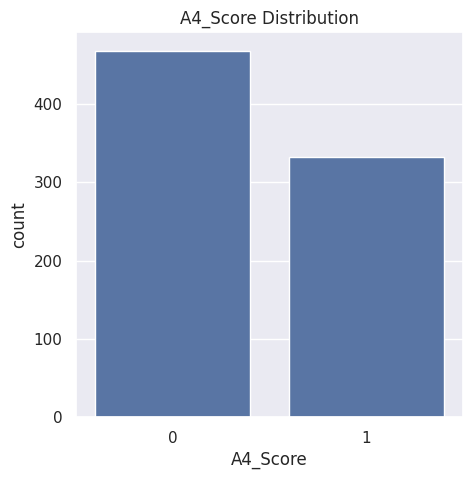

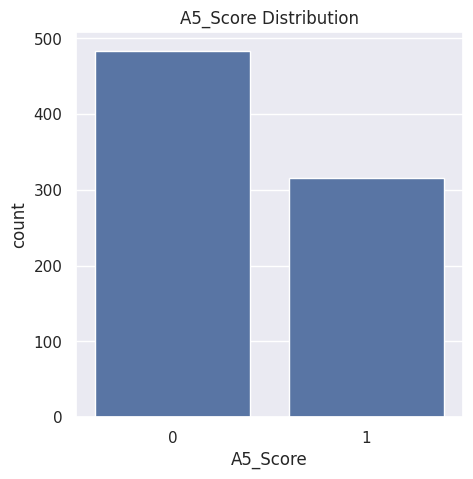

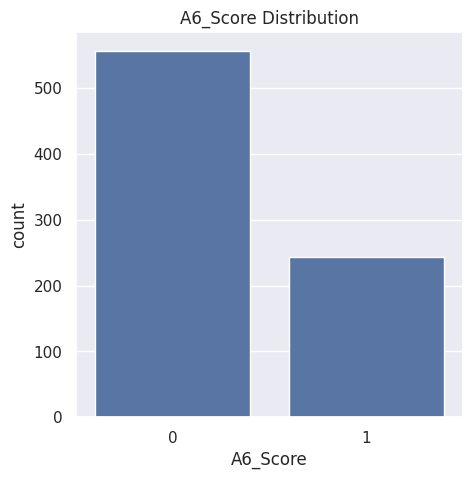

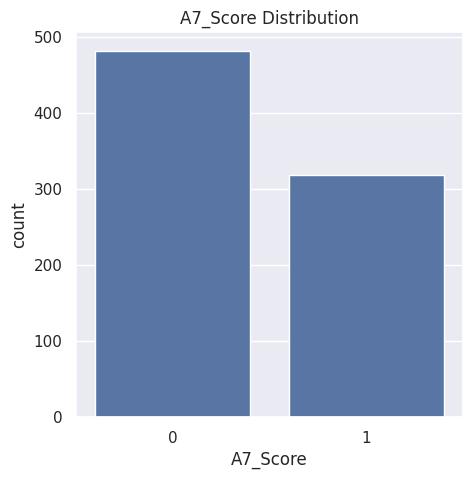

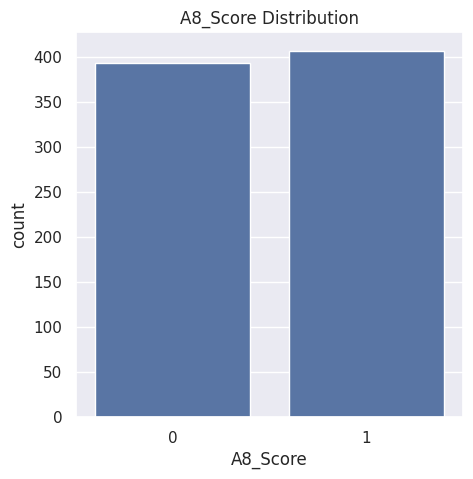

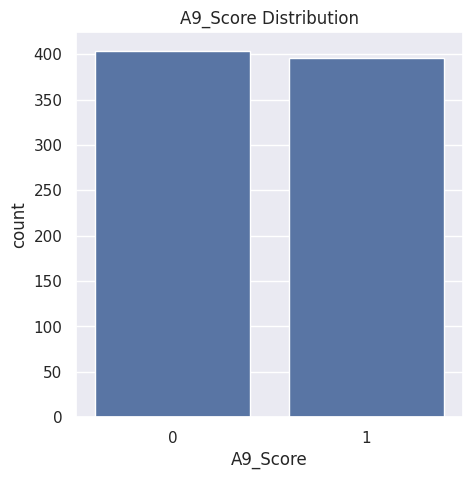

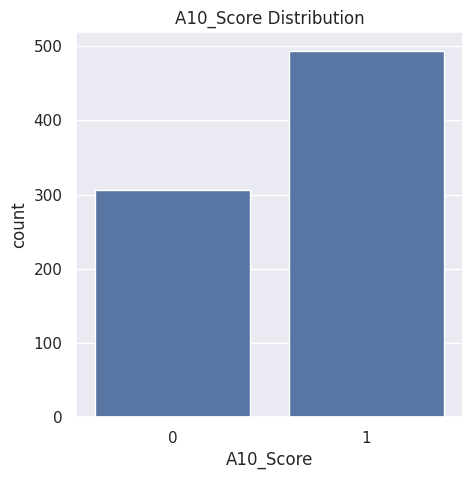

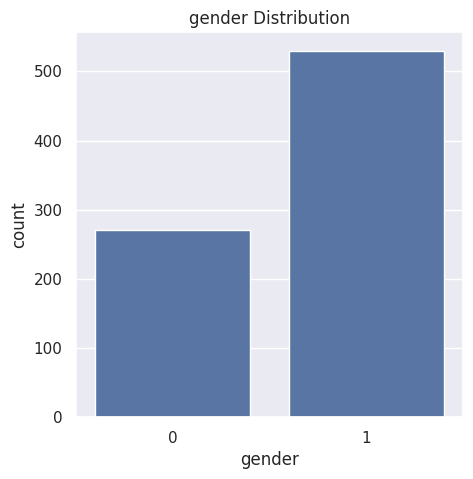

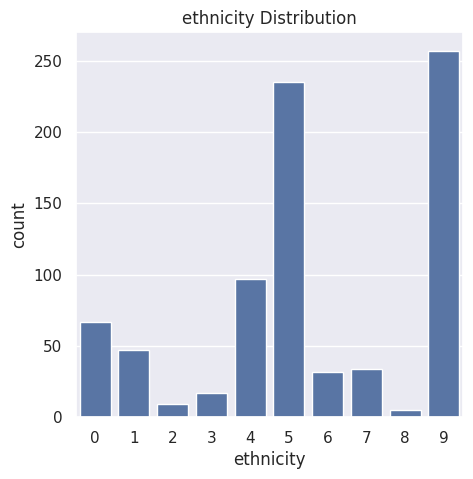

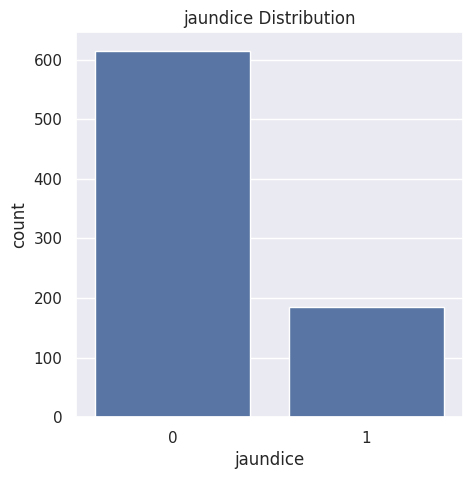

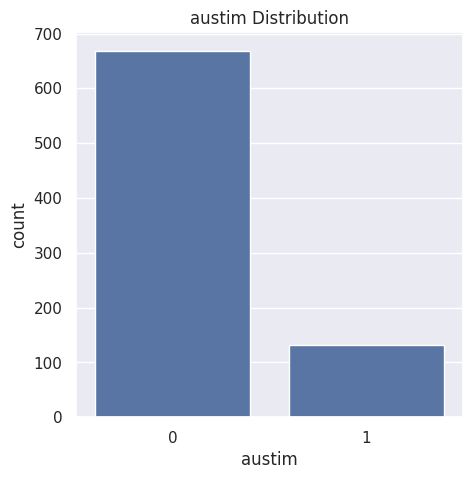

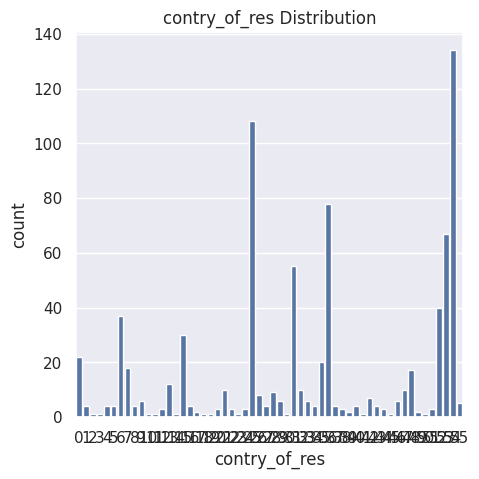

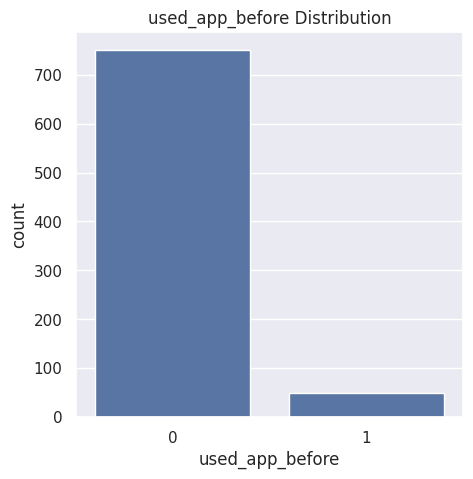

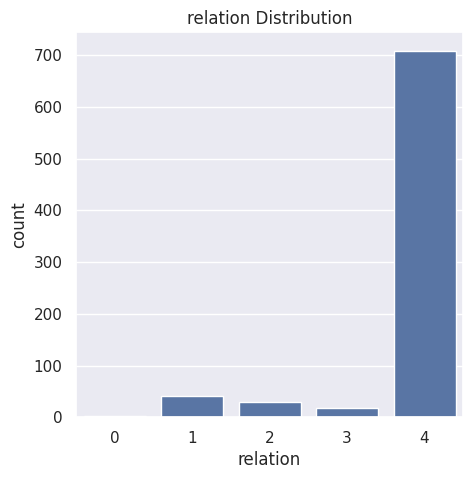

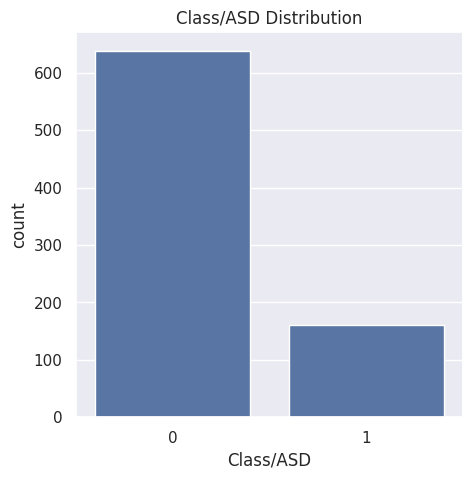

In [137]:
for col in category_columns:
  plt.figure(figsize=(5,5))
  sns.countplot(x=df[col])
  plt.title(f'{col} Distribution')
  plt.show()

In [138]:
df["Class/ASD"].value_counts()

,count
Class/ASD,
0,639
1,161


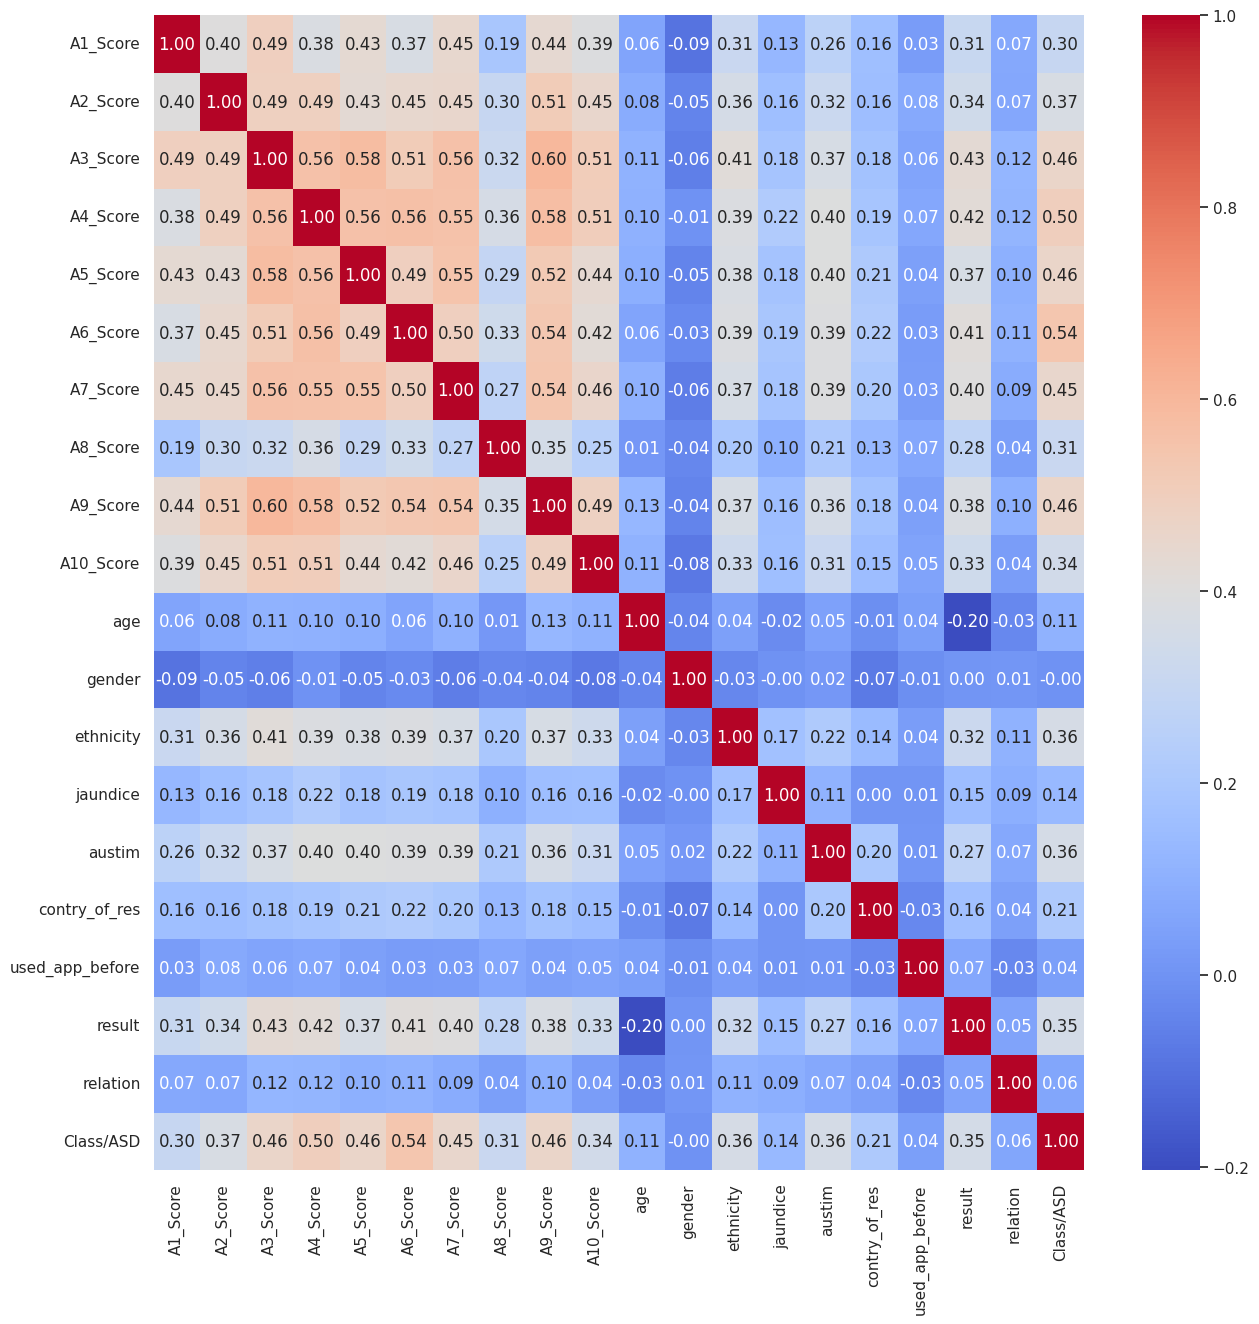

In [139]:
#Corelation Matrix
corr=sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
corr.figure.set_size_inches(15,15)
plt.show()

Insights from EDA:

There are few outliers in the numerical columns (age, results)

There is a class imbalance in the target column

There is a class imbalance in the categorical features

We don't have any highly correlated column

performed label encoding

# **4.Data Preprocessing**

handeling the outliers

In [140]:
# function to handle outliers using IQR Inter Quartile Range
def outliers(df,columns):
  Q1=df[columns].quantile(0.25)
  Q3=df[columns].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  df[columns]=df[columns].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
  return df

In [141]:
columns=['age','result']


In [142]:
for i in columns:
  df=outliers(df,i)

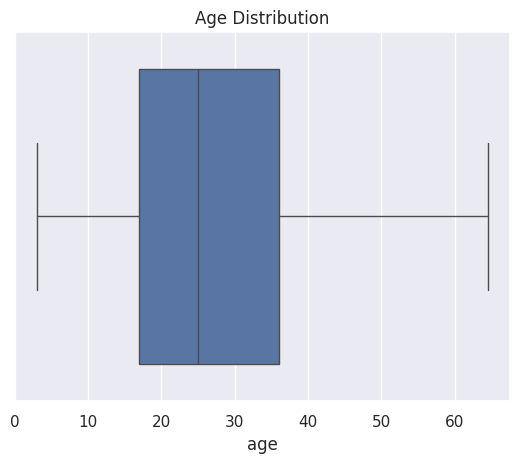

In [143]:
sns.boxplot(x=df['age'])
plt.title('Age Distribution')
plt.show()

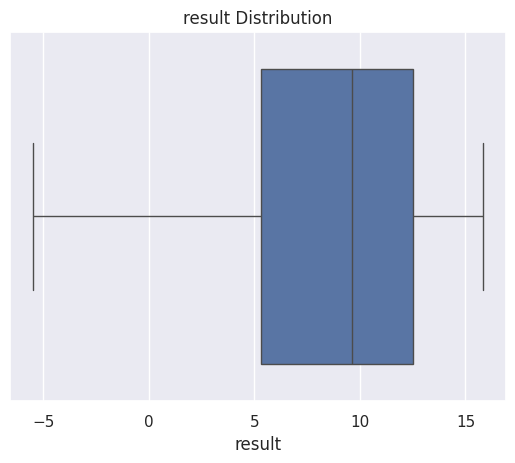

In [144]:
sns.boxplot(x=df['result'])
plt.title('result Distribution')
plt.show()

Balancing Imbalanced Datasets with SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance in datasets. It works by creating synthetic samples of the minority class, thereby balancing the dataset.

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    int64  
 12  ethnicity        800 non-null    int64  
 13  jaundice         800 non-null    int64  
 14  austim           800 non-null    int64  
 15  contry_of_res    800 non-null    int64  
 16  used_app_before  800 non-null    int64  
 17  result          

In [146]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,800.0,0.560000,0.496697,0.00000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.00000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.00000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.00000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.00000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.00000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.00000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.00000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.00000,0.000000,0.000000,1.000000,1.000000
A10_Score,800.0,0.617500,0.486302,0.00000,0.000000,1.000000,1.000000,1.000000


In [147]:
x=df.drop(columns=['Class/ASD'])
y=df['Class/ASD']

smote=SMOTE()
x_new,y_new=smote.fit_resample(x,y)

In [148]:
x_new.shape

(1278, 19)

In [149]:
y_new.shape

(1278,)

finding the best model

In [166]:
algor=[DecisionTreeClassifier,RandomForestClassifier,XGBClassifier]

In [ ]:
def best_algorithm(x,y,algorithm):


  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
  model=algorithm().fit(x_train,y_train)

  y_predtrain=model.predict(x_train)
  y_predtest=model.predict(x_test)

  Training_Accuracy= accuracy_score(y_train,y_predtrain)
  Testing_Accuracy=accuracy_score(y_test,y_predtest)

  metrics={
      'Algorithm':algorithm.__name__,
      'Training_Accuracy':Training_Accuracy,
      'Testing_Accuracy':Testing_Accuracy

  }
  return metrics

In [170]:
for i in algor:
 print( best_algorithm(x_new,y_new,i))

{'Algorithm': 'DecisionTreeClassifier', 'Training_Accuracy': 1.0, 'Testing_Accuracy': 0.890625}
{'Algorithm': 'RandomForestClassifier', 'Training_Accuracy': 1.0, 'Testing_Accuracy': 0.91015625}
{'Algorithm': 'XGBClassifier', 'Training_Accuracy': 1.0, 'Testing_Accuracy': 0.8984375}


RandomForestClassifier is good

Hyperparameter tuning


In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV

x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5],
              "min_samples_split": [2,5],
              "min_samples_leaf": [1,2],
              "max_features": ['sqrt', 'log2', None],

           }

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [174]:
gridsearch.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [175]:
gridsearch.best_score_

0.8747632711621234

In [176]:
gridsearch.best_estimator_

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=5)

In [177]:
x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)
model=RandomForestClassifier(max_depth=5, max_features='log2', min_samples_split=5).fit(x_train,y_train)
y_predtrain=model.predict(x_train)
y_predtest=model.predict(x_test)

Training_Accuracy= accuracy_score(y_train,y_predtrain)
Testing_Accuracy=accuracy_score(y_test,y_predtest)

print(f'Training Accuracy: {Training_Accuracy}')
print(f'Testing Accuracy: {Testing_Accuracy}')

Training Accuracy: 0.8972602739726028
Testing Accuracy: 0.85546875


saving the model using pickle

In [178]:
with open('autism_model.pkl','wb') as f:
  pickle.dump(model,f)

In [179]:
with open('autism_model.pkl','rb') as f:
  model_autism=pickle.load(f)

In [188]:
x_test.iloc[0]

,210
A1_Score,1.000000
A2_Score,0.000000
A3_Score,0.000000
A4_Score,0.000000
A5_Score,0.000000
A6_Score,0.000000
A7_Score,0.000000
A8_Score,0.000000
A9_Score,0.000000
A10_Score,0.000000


In [198]:
model_test=model_autism.predict([[1,0,0,0,0,3,4,9,0,0,124,1,4,0,6,31,0,5.910659,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [197]:
model_test[0]

0